<a href="https://colab.research.google.com/github/Pyeonseohee/Deeplearning/blob/main/Datascience_Post_Covid19_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# POST - COVID19 데이터 시각화 경진대회

* 가설 2: 정책이 격상될 수록 코로나 키워드 검색량이 많아질 것이다.

필요한 library 불러오기

In [45]:
import pandas as pd
from pandas import Series, DataFrame
import datetime
import matplotlib.pyplot as plt

kaggle의 searchtrend data pandas로 불러오기

In [46]:
trend = pd.read_csv('/content/drive/MyDrive/Post_Covid19/SearchTrend.csv')
trend.head()

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381


정책 실행날짜와 실행내용이 담겨있는 policy 파일 불러오기

In [47]:
policy = pd.read_csv('/content/drive/MyDrive/Post_Covid19/Policy.csv')
policy.head()

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN


In [48]:
policy.values

array([[1, 'Korea', 'Alert', 'Infectious Disease Alert Level',
        'Level 1 (Blue)', '2020-01-03', '2020-01-19'],
       [2, 'Korea', 'Alert', 'Infectious Disease Alert Level',
        'Level 2 (Yellow)', '2020-01-20', '2020-01-27'],
       [3, 'Korea', 'Alert', 'Infectious Disease Alert Level',
        'Level 3 (Orange)', '2020-01-28', '2020-02-22'],
       [4, 'Korea', 'Alert', 'Infectious Disease Alert Level',
        'Level 4 (Red)', '2020-02-23', nan],
       [5, 'Korea', 'Immigration', 'Special Immigration Procedure',
        'from China', '2020-02-04', nan],
       [6, 'Korea', 'Immigration', 'Special Immigration Procedure',
        'from Hong Kong', '2020-02-12', nan],
       [7, 'Korea', 'Immigration', 'Special Immigration Procedure',
        'from Macau', '2020-02-12', nan],
       [8, 'Korea', 'Immigration', 'Special Immigration Procedure',
        'from Japan', '2020-03-09', nan],
       [9, 'Korea', 'Immigration', 'Special Immigration Procedure',
        'from Italy', 

In [49]:
trend.shape

(1642, 5)

In [50]:
trend.iloc[1641]

date           2020-06-29
cold              0.14263
flu               0.04308
pneumonia         0.11254
coronavirus       2.41501
Name: 1641, dtype: object

In [51]:
trend.iloc[1400]

date           2019-11-01
cold              0.12054
flu               0.24426
pneumonia         0.24899
coronavirus       0.00772
Name: 1400, dtype: object

trend dataframe의 날짜 열의 data type 확인

In [52]:
type(trend['date'][0])

str

datetime type으로 바꿔주기.

In [53]:
trend['date'] = pd.to_datetime(trend['date'])

true와 false값을 저장할 T/F 열 추가

In [54]:
trend = DataFrame(trend, columns = ['date', 'cold', 'flu', 'pneumonia', 'coronavirus', 'T/F'])
trend.head()

,date,cold,flu,pneumonia,coronavirus,T/F
0,2016-01-01,0.11663,0.05590,0.15726,0.00736,NaN
1,2016-01-02,0.13372,0.17135,0.20826,0.00890,NaN
2,2016-01-03,0.14917,0.22317,0.19326,0.00845,NaN
3,2016-01-04,0.17463,0.18626,0.29008,0.01145,NaN
4,2016-01-05,0.17226,0.15072,0.24562,0.01381,NaN


trend file에 2016부터의 자료가 있으므로 2019년 11월쯤의 자료만 모아보기

In [55]:
trend['T/F'] = trend.date > pd.to_datetime('2019-10-31')
trend.loc[1400:]

,date,cold,flu,pneumonia,coronavirus,T/F
1400,2019-11-01,0.12054,0.24426,0.24899,0.00772,True
1401,2019-11-02,0.10226,0.19917,0.20190,0.00872,True
1402,2019-11-03,0.11099,0.18735,0.18690,0.00590,True
1403,2019-11-04,0.14917,0.27926,0.31999,0.00754,True
1404,2019-11-05,0.15617,0.27090,0.30717,0.01272,True
...,...,...,...,...,...,...
1637,2020-06-25,0.12072,0.04190,0.11936,2.16993,True
1638,2020-06-26,0.11381,0.03027,0.11317,2.15139,True
1639,2020-06-27,0.10554,0.02136,0.08354,1.96848,True
1640,2020-06-28,0.12563,0.02872,0.08072,2.19720,True


In [56]:
droped = trend[trend['T/F'] == False].index
trend = trend.drop(droped)

In [57]:
trend.head()

,date,cold,flu,pneumonia,coronavirus,T/F
1400,2019-11-01,0.12054,0.24426,0.24899,0.00772,True
1401,2019-11-02,0.10226,0.19917,0.20190,0.00872,True
1402,2019-11-03,0.11099,0.18735,0.18690,0.00590,True
1403,2019-11-04,0.14917,0.27926,0.31999,0.00754,True
1404,2019-11-05,0.15617,0.27090,0.30717,0.01272,True


In [58]:
trend.index = trend['date']
trend.head()

,date,cold,flu,pneumonia,coronavirus,T/F
date,,,,,,
2019-11-01,2019-11-01,0.12054,0.24426,0.24899,0.00772,True
2019-11-02,2019-11-02,0.10226,0.19917,0.20190,0.00872,True
2019-11-03,2019-11-03,0.11099,0.18735,0.18690,0.00590,True
2019-11-04,2019-11-04,0.14917,0.27926,0.31999,0.00754,True
2019-11-05,2019-11-05,0.15617,0.27090,0.30717,0.01272,True


사회적 거리두기 단계에 따른 searchtrend 살펴보기

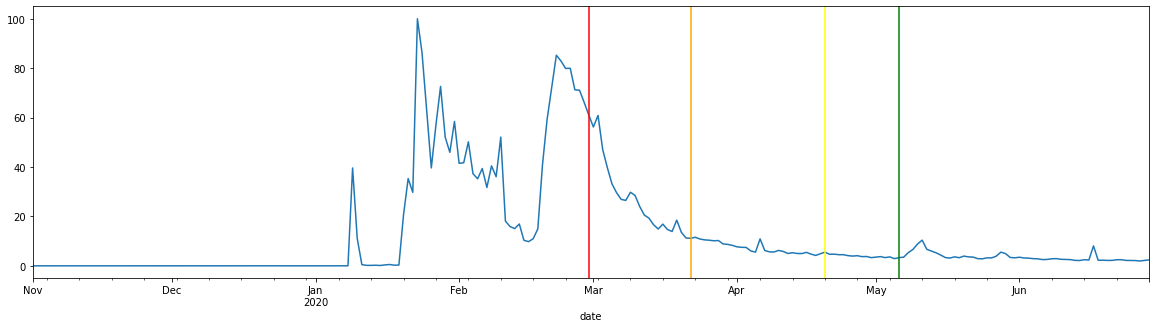

In [59]:
trend['coronavirus'].plot(figsize=(20,5))
plt.axvline(x='2020-02-29', ymin=0.0, ymax=1.0, color='red')
plt.axvline(x='2020-03-22', ymin=0.0, ymax=1.0, color='orange')
plt.axvline(x='2020-04-20', ymin=0.0, ymax=1.0, color='yellow')
plt.axvline(x='2020-05-06', ymin=0.0, ymax=1.0, color='green')

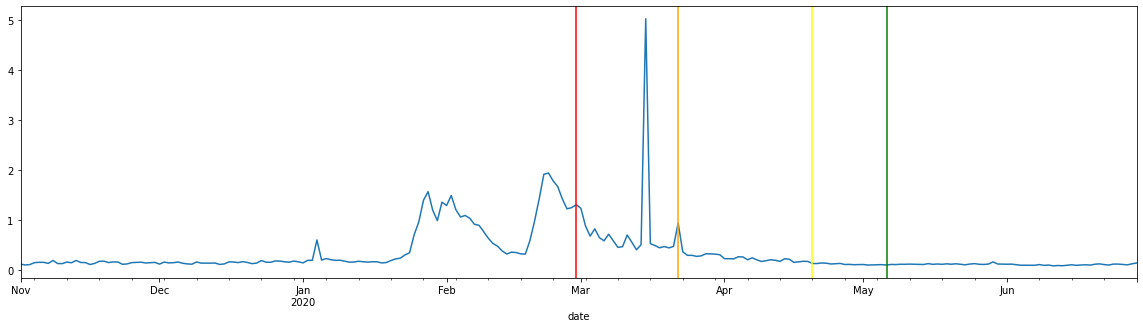

In [60]:
trend['cold'].plot(figsize=(20,5))
plt.axvline(x='2020-02-29', ymin=0.0, ymax=1.0, color='red')
plt.axvline(x='2020-03-22', ymin=0.0, ymax=1.0, color='orange')
plt.axvline(x='2020-04-20', ymin=0.0, ymax=1.0, color='yellow')
plt.axvline(x='2020-05-06', ymin=0.0, ymax=1.0, color='green')

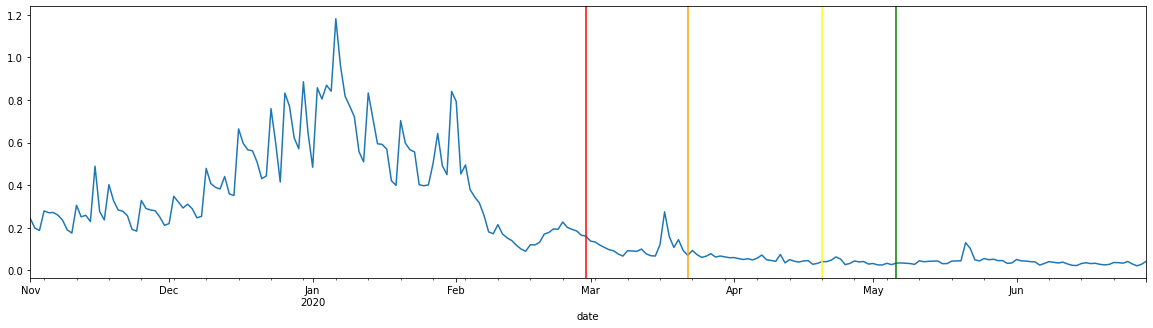

In [61]:
trend['flu'].plot(figsize=(20,5))
plt.axvline(x='2020-02-29', ymin=0.0, ymax=1.0, color='red')
plt.axvline(x='2020-03-22', ymin=0.0, ymax=1.0, color='orange')
plt.axvline(x='2020-04-20', ymin=0.0, ymax=1.0, color='yellow')
plt.axvline(x='2020-05-06', ymin=0.0, ymax=1.0, color='green')

전염 경보 레벨에 따른 searchtrend 변화

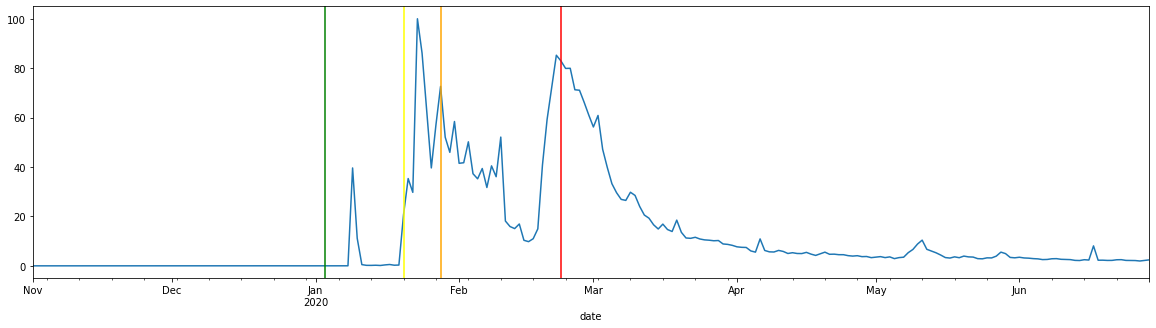

In [62]:
trend['coronavirus'].plot(figsize=(20,5))
plt.axvline(x='2020-01-03', ymin=0.0, ymax=1.0, color='green')
plt.axvline(x='2020-01-20', ymin=0.0, ymax=1.0, color='yellow')
plt.axvline(x='2020-01-28', ymin=0.0, ymax=1.0, color='orange')
plt.axvline(x='2020-02-23', ymin=0.0, ymax=1.0, color='red')

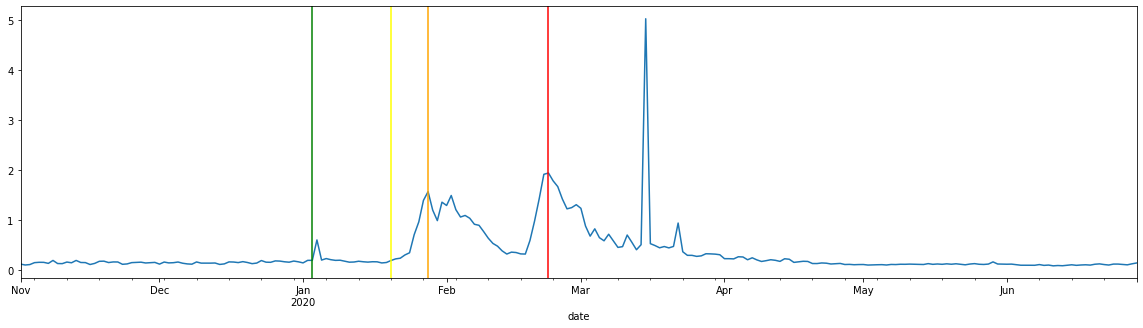

In [63]:
trend['cold'].plot(figsize=(20,5))
plt.axvline(x='2020-01-03', ymin=0.0, ymax=1.0, color='green')
plt.axvline(x='2020-01-20', ymin=0.0, ymax=1.0, color='yellow')
plt.axvline(x='2020-01-28', ymin=0.0, ymax=1.0, color='orange')
plt.axvline(x='2020-02-23', ymin=0.0, ymax=1.0, color='red')

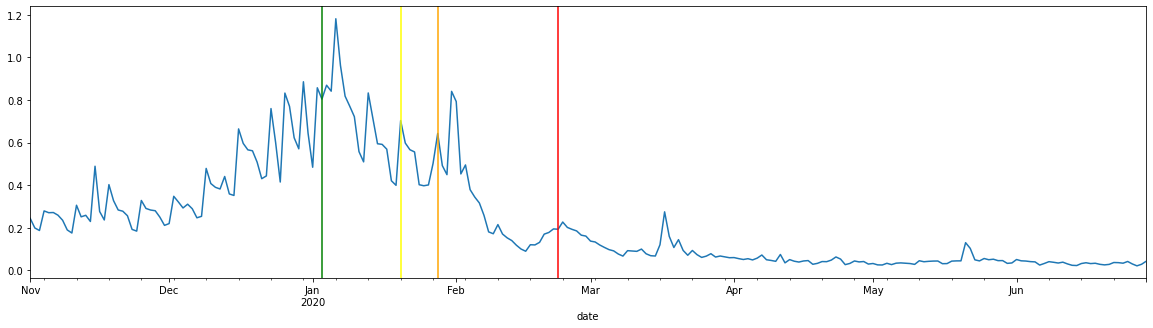

In [64]:
trend['flu'].plot(figsize=(20,5))
plt.axvline(x='2020-01-03', ymin=0.0, ymax=1.0, color='green')
plt.axvline(x='2020-01-20', ymin=0.0, ymax=1.0, color='yellow')
plt.axvline(x='2020-01-28', ymin=0.0, ymax=1.0, color='orange')
plt.axvline(x='2020-02-23', ymin=0.0, ymax=1.0, color='red')

search trend 간의 상관계수(corr) 확인하기

In [65]:
trend.corr()

,cold,flu,pneumonia,coronavirus,T/F
cold,1.000000,0.067614,0.218791,0.684278,NaN
flu,0.067614,1.000000,0.429369,0.065522,NaN
pneumonia,0.218791,0.429369,1.000000,0.412048,NaN
coronavirus,0.684278,0.065522,0.412048,1.000000,NaN
T/F,NaN,NaN,NaN,NaN,NaN


누적 확진자 수가 기록된 Time.csv 파일 불러오기

In [109]:
confirmed = pd.read_csv('/content/drive/MyDrive/Post_Covid19/Time.csv', usecols = ['date', 'confirmed'])
confirmed.head()

,date,confirmed
0,2020-01-20,1
1,2020-01-21,1
2,2020-01-22,1
3,2020-01-23,1
4,2020-01-24,2


누적 확진자 수 데이터에서 일일 확진자 수 데이터 구하기

In [110]:
confirmed=confirmed.sort_values(['date'],ascending=False)
confirmed=confirmed.reset_index()
confirmed=confirmed.drop(['index'],axis=1)

dict_case=[]
for i in range(len(confirmed)-1):
    dict_case.append(confirmed['confirmed'][i]-confirmed['confirmed'][i+1])
dict_case.append(1)

confirmed['daily']=dict_case
confirmed=confirmed.sort_values(['date'],ascending=True)
confirmed=confirmed.reset_index()
confirmede=confirmed.drop(['index'],axis=1)

In [111]:
confirmed.head()

,index,date,confirmed,daily
0,162,2020-01-20,1,1
1,161,2020-01-21,1,0
2,160,2020-01-22,1,0
3,159,2020-01-23,1,0
4,158,2020-01-24,2,1


In [112]:
type(confirmed['date'][0])

str

In [113]:
confirmed['date'] = pd.to_datetime(confirmed['date'])
type(confirmed['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [114]:
confirmed.index = confirmed['date']
confirmed.head()

,index,date,confirmed,daily
date,,,,
2020-01-20,162,2020-01-20,1,1
2020-01-21,161,2020-01-21,1,0
2020-01-22,160,2020-01-22,1,0
2020-01-23,159,2020-01-23,1,0
2020-01-24,158,2020-01-24,2,1


In [72]:
confirmed.drop(columns = ['index', 'date','confirmed'], inplace =True)
confirmed.head()

,daily
date,
2020-01-20,1
2020-01-21,0
2020-01-22,0
2020-01-23,0
2020-01-24,1


일일 확진자 시각화

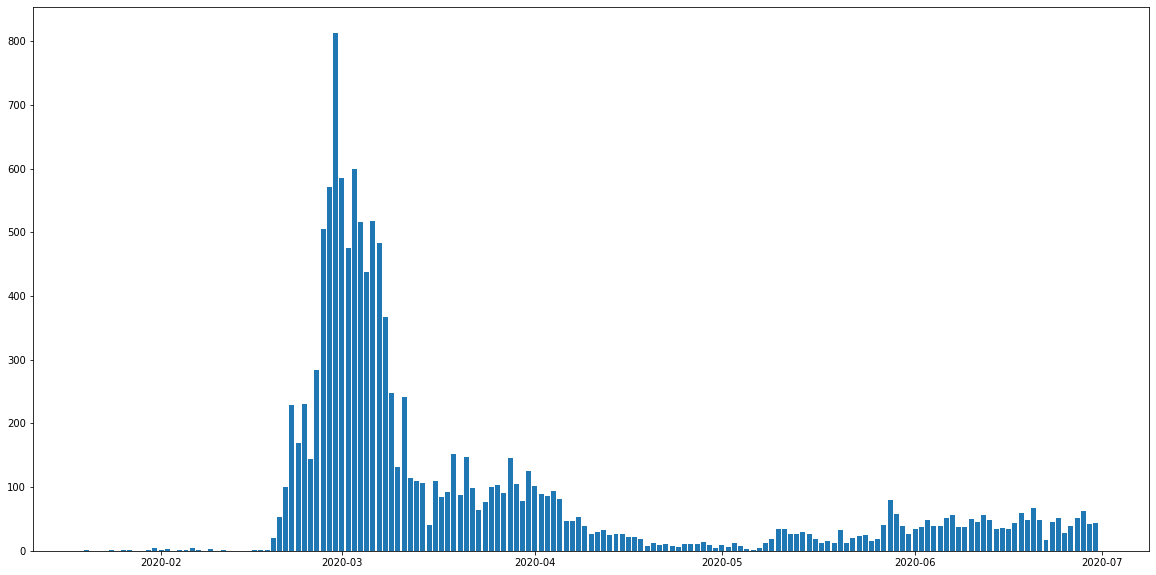

In [129]:
plt.bar(confirmed['date'], confirmed['daily'])
plt.rcParams['figure.figsize'] = [20,5]
plt.show()

In [76]:
new = pd.merge(confirmed, trend, left_index = True, right_index = True)
new.head()

,daily,date,cold,flu,pneumonia,coronavirus,T/F
date,,,,,,,
2020-01-20,1,2020-01-20,0.19217,0.70343,3.63716,20.69610,True
2020-01-21,0,2020-01-21,0.22462,0.59789,4.31987,35.33284,True
2020-01-22,0,2020-01-22,0.23808,0.56661,3.66416,29.74474,True
2020-01-23,0,2020-01-23,0.30308,0.55625,3.18035,100.00000,True
2020-01-24,1,2020-01-24,0.34689,0.40226,2.48156,86.11541,True


In [77]:
new['daily'].corr(new['coronavirus'])

0.4085281663390897

# 결론: searchtrend와 정책 격상과의 관계-> 격상 당시에는 증가하지만, 그 이후로는 익숙해져 searchtrend가 급격히 감소한다.

# 또한 searchtrend는 일일 확진자 수와 양의 상관관계를 보인다.